I `scp`'d one of Joe's catalogs of the SLAC server and am going to start playing with it. My first order of business was figuring out what it actually was, because it wasn't super clear to me how it was stored. For one thing, Joe wrote the file extension as `.fit` instead of `.fits` which threw me for a bigger loop than it should've. I also had to brush up on my astropy. 

In [1]:
from astropy.io import fits
hdulist = fits.open('/home/sean/Downloads/Buzzard-highres_v1.0_snfields_obs.fit')
print hdulist.info()

Filename: /home/sean/Downloads/Buzzard-highres_v1.0_snfields_obs.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU     39   1345374R x 11C   [K, D, D, E, E, 4E, 4E, E, E, I, B]   
None


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
obsData = hdulist[1].data
obsData.shape

(1345374,)

In [3]:
hdulist[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   75 /Number of bytes per row                         
NAXIS2  =              1345374 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   11 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [4]:
print obsData[:10]

[ (909121, 43.177799224853516, 0.94513100385665894, 16.951042, 0.004166659, array([ 17.70660973,  17.25094414,  17.0893383 ,  16.95442581], dtype=float32), array([ 0.01091805,  0.00494499,  0.00461872,  0.00417967], dtype=float32), 0.0512329, 0.0, 0, 0)
 (909408, 42.898101806640625, 0.94212502241134644, 20.824661, 0.02744847, array([ 21.31021118,  20.92447853,  20.77585411,  20.79455376], dtype=float32), array([ 0.0612695 ,  0.02725015,  0.02633752,  0.02669777], dtype=float32), 0.0495423, 0.0, 0, 0)
 (909577, 43.180198669433594, 0.90289002656936646, 21.17029, 0.033501342, array([ 20.73554039,  20.89208412,  21.11346436,  21.18303108], dtype=float32), array([ 0.04446345,  0.02783066,  0.03294384,  0.03389682], dtype=float32), 0.053511798, 0.0, 0, 0)
 (909622, 42.702301025390625, 0.95246297121047974, 21.557201, 0.041814197, array([ 21.9032402 ,  21.6973362 ,  21.51233673,  21.43984795], dtype=float32), array([ 0.07237934,  0.04082802,  0.04020816,  0.03753017], dtype=float32), 0.0590527

In [5]:
elem = obsData[0]
print elem
print type(elem)

(909121, 43.177799224853516, 0.94513100385665894, 16.951042, 0.004166659, array([ 17.70660973,  17.25094414,  17.0893383 ,  16.95442581], dtype=float32), array([ 0.01091805,  0.00494499,  0.00461872,  0.00417967], dtype=float32), 0.0512329, 0.0, 0, 0)
<class 'astropy.io.fits.fitsrec.FITS_record'>


In [6]:
cols = obsData.columns
print cols.info()

name:
    ['ID', 'RA', 'DEC', 'IMAG', 'IMAG_ERR', 'MODEL_MAG', 'MODEL_MAGERR', 'ZTRUE', 'M200', 'CENTRAL', 'FLAGGED']
format:
    ['K', 'D', 'D', 'E', 'E', '4E', '4E', 'E', 'E', 'I', 'B']
unit:
    ['', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '']
None


In [7]:
c = obsData['CENTRAL']
print c, len(c)

[0 0 0 ..., 1 1 1] 1345374


244173 <type 'numpy.ndarray'>


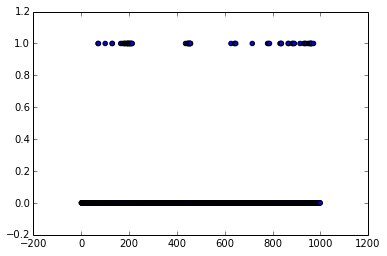

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
print c.sum(), type(c)
plt.scatter(xrange(1000), c[:1000])

0.668457 0.358107


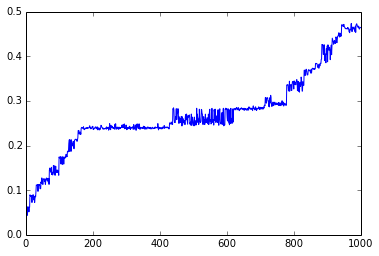

In [9]:
zs = obsData['ZTRUE']
print zs.mean(), zs.std()
plt.plot(zs[:1000])

7.92028e+11 4.47069e+12


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


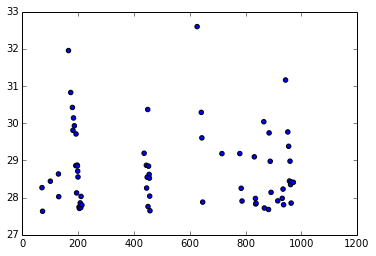

In [10]:
mass = obsData['M200']
import numpy as np
print mass.mean(), mass.std()
plt.scatter(xrange(1000), np.log(mass[:1000]))

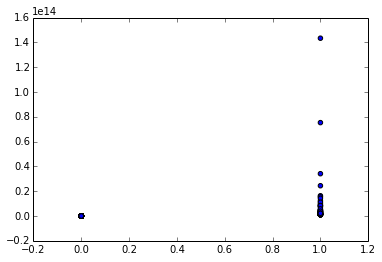

In [11]:
plt.scatter(c[:1000], mass[:1000])

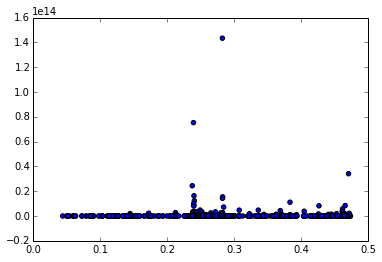

In [12]:
plt.scatter(zs[:1000], mass[:1000])
#plt.yscale('log')
plt.show()

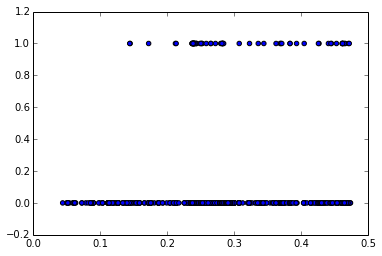

In [13]:
plt.scatter(zs[:1000], c[:1000])

In [14]:
hdulist = fits.open('/home/sean/Downloads/Buzzard-highres_v1.0_redmapper_lgt20_catalog.fit')
print hdulist.info()

Filename: /home/sean/Downloads/Buzzard-highres_v1.0_redmapper_lgt20_catalog.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       4   ()              
1                BinTableHDU    149   1021R x 66C   [J, D, D, 4E, 4E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 3E, 3E, 4E, E, E, E, I, E, E, E, E, 21E, 21E, I, E, D, D, E, E, E, E, E, E, E, I, I, 5D, 5D, 5K, 5E, 5E, 5E, 5E, 5E, 5E, E, 5E, 5E, E, E, E, E, E, E, E]   
None


In [15]:
redmapperData = hdulist[1].data
cols = redmapperData.columns
#TODO Redmapper paper probably has details
cols.info()

name:
    ['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'IMAG', 'IMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z', 'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E', 'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ', 'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE', 'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG', 'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT', 'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT', 'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT', 'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW', 'LIM_EXPTIME', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD']
format:
    ['J', 'D', 'D', '4E', '4E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', '3E', '3E', '4E', 'E', 'E', 'E', 'I', 'E', 'E

(1021, 3)


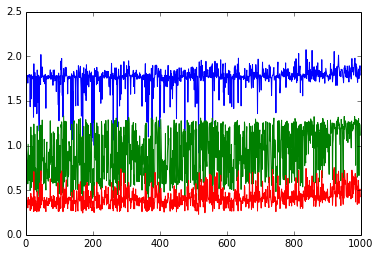

In [16]:
cl = redmapperData['C_LAMBDA']
print cl.shape
plt.plot(cl[:1000])

#### 10/12/15
Haven't looked at a lot of this in awhile but I've pulled down 2 additional catalogs. I now have one of each from the ones Risa suggested I look at. For the halo and truth catalogs (the ones I just got) there are many, many catalogs in the same set. I suppose that makes sense, because the other 2 are reduced sets of that larger data (I think). That's Redmapper and an observed field. 

In [17]:
%%bash 
ls ~/Downloads/*.fit

/home/sean/Downloads/Buzzard-highres_galaxies_shmatch.9951.fit
/home/sean/Downloads/Buzzard-highres_halos.9951.fit
/home/sean/Downloads/Buzzard-highres_v1.0_redmapper_lgt20_catalog.fit
/home/sean/Downloads/Buzzard-highres_v1.0_snfields_obs.fit


In [18]:
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()

In [19]:
hdulist = fits.open('/home/sean/Downloads/Buzzard-highres_halos.9951.fit')
print hdulist.info()

Filename: /home/sean/Downloads/Buzzard-highres_halos.9951.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                BinTableHDU     44   178355R x 18C   [K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


In [20]:
data = hdulist[1]
cols = data.columns
cols.info()

name:
    ['id', 'pid', 'upid', 'm200b', 'm200c', 'mvir', 'rvir', 'rs', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'vrms', 'ra', 'dec', 'zspec']
format:
    ['K', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [21]:
haloData = data.data
print haloData.shape

(178355,)


In [22]:
print haloData[0]

(2285678, -1, -1, 23065000000.0, 23065000000.0, 23660000000.0, 73.683000000000007, 12.435, 124.42400000000001, 5027.4799999999996, -4237.3100000000004, 164.78, -100.09, -153.66999999999999, 126.61, 88.582288720861143, -40.116544010804944, -1.0)


In [23]:
hdulist = fits.open('/home/sean/Downloads/Buzzard-highres_galaxies_shmatch.9951.fit')
print hdulist.info()

Filename: /home/sean/Downloads/Buzzard-highres_galaxies_shmatch.9951.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1                BinTableHDU     56   24527R x 24C   [J, J, 5E, 5E, E, E, E, E, E, E, E, E, E, I, J, E, I, E, E, I, E, E, E, E]   
None


In [24]:
#Truth catalog
#Q: What's in the "Truth" catalog
dataTable = hdulist[1]
dataTable.columns.info()

trueData = dataTable.data
print trueData.shape

name:
    ['ID', 'ECATID', 'OMAG', 'AMAG', 'Z', 'RA', 'DEC', 'PX', 'PY', 'PZ', 'VX', 'VY', 'VZ', 'EDGE', 'HALOID', 'M200', 'NGALS', 'R200', 'RHALO', 'CENTRAL', 'MSTAR', 'D8', 'NNDIST', 'NNPERCENT']
format:
    ['J', 'J', '5E', '5E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'J', 'E', 'I', 'E', 'E', 'I', 'E', 'E', 'E', 'E']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '',

In [25]:
print trueData[0]

(5853, 191628, array([ 20.10269928,  19.34760094,  19.11590004,  18.98559952,  18.88380051], dtype=float32), array([-14.6072998 , -15.29139996, -15.55150032, -15.77089977, -15.80350018], dtype=float32), 0.028286399, 88.498802, -40.018002, 1.68747, 64.388901, -54.081799, -64.5, 12.53, -24.6, 0, 1598376841, 2.7996701e+10, -99, 0.0, 84.104813, 1, 47252628.0, 0.0, 6.53299, 0.13958301)


In [26]:
print haloData[0]

(2285678, -1, -1, 23065000000.0, 23065000000.0, 23660000000.0, 73.683000000000007, 12.435, 124.42400000000001, 5027.4799999999996, -4237.3100000000004, 164.78, -100.09, -153.66999999999999, 126.61, 88.582288720861143, -40.116544010804944, -1.0)


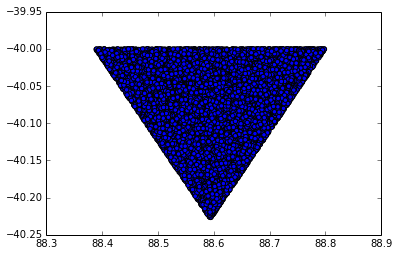

In [27]:
#lets see the differences in the footprints
plt.scatter(trueData['RA'], trueData['DEC'])

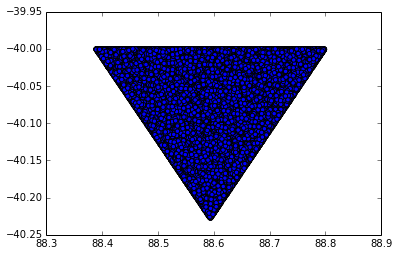

In [28]:
plt.scatter(haloData['RA'], haloData['DEC'])

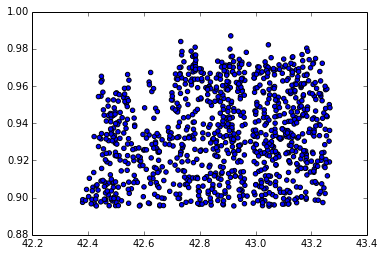

In [29]:
plt.scatter(obsData['RA'][:1000], obsData['DEC'][:1000])

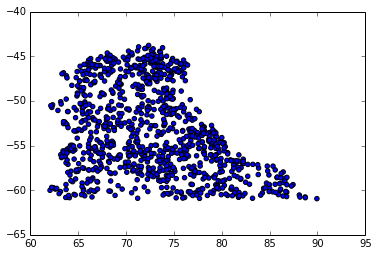

In [30]:
plt.scatter(redmapperData['RA'][:1000], redmapperData['DEC'][:1000])

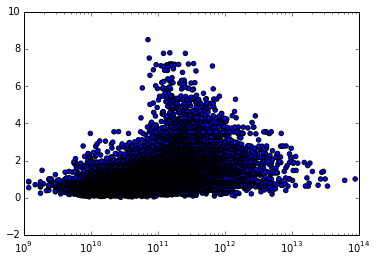

In [36]:
N = trueData.shape[0]
plt.scatter(trueData['M200'][:N], trueData['Z'][:N])
plt.xscale('log')

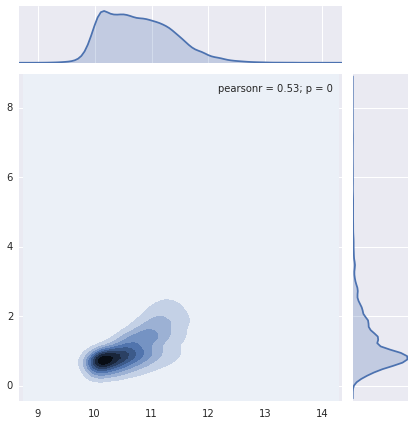

In [42]:
import seaborn as sns
sns.set()

sns.jointplot(np.log10(trueData['M200']), trueData['Z'], kind = 'kde')